# 10 Approximate Inference

## 10.2. Illustration: Variational Mixture of Gaussians

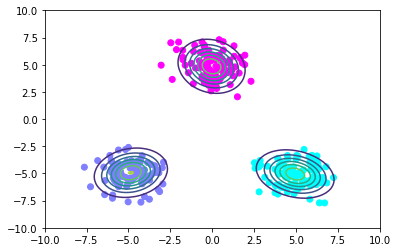

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *


def make_blobs():
    cls1 = np.random.normal(size=(100, 2), loc=(-5,-5))
    cls2 = np.random.normal(size=(100, 2), loc=(5, -5))
    cls3 = np.random.normal(size=(100, 2), loc=(0, 5))
    return np.vstack((cls1, cls2, cls3))


# training & test data
X_train = make_blobs()
x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).T


''' variational reasoning '''
vbgm = BayesianGaussianMixture(n_components=10, alpha_0=0.01)
vbgm.fit(X_train)
Z = vbgm.predict(X_test)


plt.contour(x_test, y_test, Z.reshape(x_test.shape))
plt.scatter(X_train[:, 0], X_train[:, 1], cmap='cool', c=vbgm.classify(X_train))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

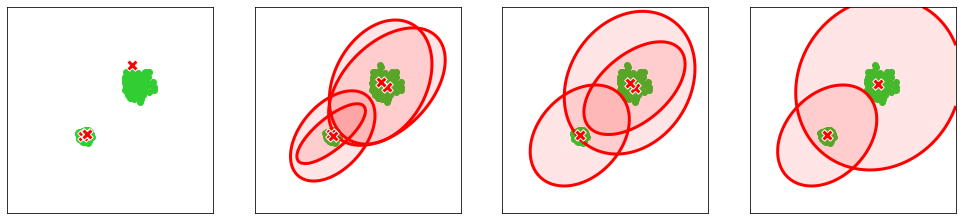

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
from scipy.linalg import eigh




def ellipse_draw(ax, covs, means):
    dev = X_test[None,:,:] - means[:,None,:]
    map = np.einsum('kij, knj -> kni', covs, dev)
    maha = np.sum(dev * map, axis=-1)
    for k in range(maha.shape[0]):
        ax_.contour(x_test, y_test, maha[k].reshape(x_test.shape),
                    levels=np.linspace(0, 1, 2), colors='r', linewidths=3)
        ax_.contourf(x_test, y_test, maha[k].reshape(x_test.shape),
                    levels=np.linspace(0, 1, 2), colors=('r', 'w'), alpha=0.1)


def make_blobs():
    center = 20
    cls1 = np.random.normal(size=(300, 2), loc=(-center, -center), scale=2)
    cls2 = np.random.normal(size=(150, 2), loc=(center, center), scale=5)
    return np.vstack((cls1, cls2))



# training data & test data
X_train = make_blobs()
x_test, y_test = np.meshgrid(np.linspace(-80, 80, 100), np.linspace(-80, 80, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).T


''' Variational Gaussian Mixture '''
model = BayesianGaussianMixture(n_components=4, alpha_0=0.01)
model.fit(X_train, n_iter=100)
labels = model.classify(X_train)
Z = model.predict(X_test)



fig = plt.figure(figsize=(17,4))
keys = list(model.eff_means.keys())
n_step = len(keys)
keys = [keys[0], keys[n_step // 4], keys[2 * n_step // 3], keys[-1]]

for n, key in enumerate(keys):
    ax_ = fig.add_subplot(1, len(keys), n+1)
    ax_.scatter(*X_train.T, c='limegreen')
    ax_.scatter(*model.eff_means[key].T, s=130, marker='X', lw=1, c='r', edgecolor="white", zorder=3)
    ellipse_draw(ax_, model.eff_covs[key], model.eff_means[key])
    ax_.set_xlim(-80, 80)
    ax_.set_ylim(-80, 80)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False, left=False)
plt.show()